#Importação e exploração de dados


In [73]:
# Tratamento dos dados
import numpy as np
import pandas as pd

# Modelos de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Métricas de avaliação
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay, confusion_matrix, classification_report

# Plot dos gráficos
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

# Recebendo os dados
from googledrivedownloader import download_file_from_google_drive as gdd

In [74]:
# Recebendo os dados
data_google_id = '1WH9NcpT6vw74XaZ37B2Es3DvudmEERhg'
gdd(file_id=data_google_id,
    dest_path = './dados.csv',
    showsize = True)

# Armazenando os dados em um DataFrame
dados = pd.read_csv("dados.csv", sep = ',')

In [75]:
dados.head()


,temperatura,vibracao,pressao,horas_uso,material,turno,operador,falha
0,101.0,3.165841,130.0,1727.0,ferro,manhã,senior,sem falha
1,64.0,2.797605,144.0,NaN,alumínio,tarde,senior,sem falha
2,110.0,2.096091,79.0,8496.0,ferro,manhã,pleno,falha
3,NaN,2.654747,98.0,6658.0,ferro,manhã,NaN,sem falha
4,73.0,4.493216,117.0,5372.0,ferro,noite,pleno,sem falha


In [76]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperatura  4752 non-null   float64
 1   vibracao     4780 non-null   float64
 2   pressao      4759 non-null   float64
 3   horas_uso    4768 non-null   float64
 4   material     4762 non-null   object 
 5   turno        4743 non-null   object 
 6   operador     4756 non-null   object 
 7   falha        4734 non-null   object 
dtypes: float64(4), object(4)
memory usage: 312.6+ KB


In [77]:
# Verificação de valores nulos por colunas
dados.isnull().sum()

,0
temperatura,248
vibracao,220
pressao,241
horas_uso,232
material,238
turno,257
operador,244
falha,266


In [78]:
# Estatísticas descritivas (Média, desvio, mínimo/maxima)
dados.describe()


,temperatura,vibracao,pressao,horas_uso
count,4752.000000,4780.000000,4759.000000,4768.000000
mean,84.552609,2.516839,109.284514,5057.643037
std,20.078549,1.402406,23.081661,2909.272379
min,50.000000,0.100259,70.000000,101.000000
25%,67.000000,1.313188,89.000000,2455.000000
50%,85.000000,2.482737,109.000000,5115.000000
75%,102.000000,3.724844,130.000000,7641.000000
max,119.000000,4.997357,149.000000,9998.000000


array([[<Axes: title={'center': 'temperatura'}>,
        <Axes: title={'center': 'vibracao'}>],
       [<Axes: title={'center': 'pressao'}>,
        <Axes: title={'center': 'horas_uso'}>]], dtype=object)

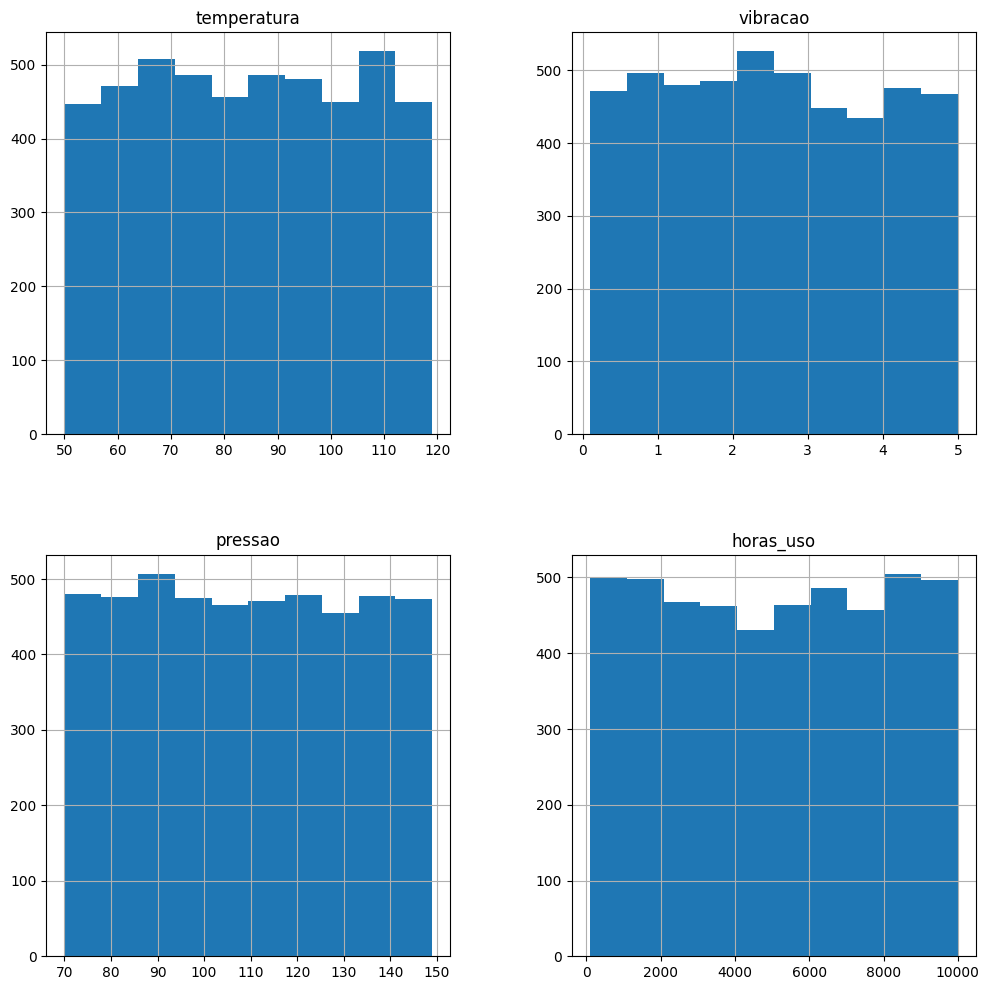

In [79]:
# Visualização simples dos dados
dados.hist(figsize=(12,12))


# Tratamento de dados


In [80]:
# Inserindo valor de moda nos locais onde valores são nulos
for column in dados.columns:
    if dados[column].dtype == 'object':
        dados[column].fillna(dados[column].mode()[0], inplace=True)
    else:
        dados[column].fillna(dados[column].median(), inplace=True)

/tmp/ipython-input-3228087821.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados[column].fillna(dados[column].median(), inplace=True)
/tmp/ipython-input-3228087821.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [81]:
dados.isnull().sum()

,0
temperatura,0
vibracao,0
pressao,0
horas_uso,0
material,0
turno,0
operador,0
falha,0


In [82]:
# Aplicando Label Enconding na coluna de falhas
dados['falha'] =dados['falha'].map({'sem falha':0 , 'falha': 1})

In [83]:
# Aplicando One Hot Encoding nas colunas material, turno e operador
material = pd.get_dummies(dados['material'], prefix = 'materiais', dtype=int)
turno = pd.get_dummies(dados['turno'], prefix = 'turno', dtype=int)
operador = pd.get_dummies(dados['operador'], prefix = 'operador', dtype=int)


In [84]:
material.head()

,materiais_alumínio,materiais_aço,materiais_ferro
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [85]:
dados_corrigidos = pd.concat([dados,material,turno,operador], axis = 1)

In [86]:
dados_corrigidos.head()

,temperatura,vibracao,pressao,horas_uso,material,turno,operador,falha,materiais_alumínio,materiais_aço,materiais_ferro,turno_manhã,turno_noite,turno_tarde,operador_junior,operador_pleno,operador_senior
0,101.0,3.165841,130.0,1727.0,ferro,manhã,senior,0,0,0,1,1,0,0,0,0,1
1,64.0,2.797605,144.0,5115.0,alumínio,tarde,senior,0,1,0,0,0,0,1,0,0,1
2,110.0,2.096091,79.0,8496.0,ferro,manhã,pleno,1,0,0,1,1,0,0,0,1,0
3,85.0,2.654747,98.0,6658.0,ferro,manhã,senior,0,0,0,1,1,0,0,0,0,1
4,73.0,4.493216,117.0,5372.0,ferro,noite,pleno,0,0,0,1,0,1,0,0,1,0


In [87]:
dados_corrigidos.drop(columns=['material'], inplace=True)
dados_corrigidos.drop(columns=['turno'], inplace=True)
dados_corrigidos.drop(columns=['operador'], inplace=True)

In [88]:
dados_corrigidos.head()


,temperatura,vibracao,pressao,horas_uso,falha,materiais_alumínio,materiais_aço,materiais_ferro,turno_manhã,turno_noite,turno_tarde,operador_junior,operador_pleno,operador_senior
0,101.0,3.165841,130.0,1727.0,0,0,0,1,1,0,0,0,0,1
1,64.0,2.797605,144.0,5115.0,0,1,0,0,0,0,1,0,0,1
2,110.0,2.096091,79.0,8496.0,1,0,0,1,1,0,0,0,1,0
3,85.0,2.654747,98.0,6658.0,0,0,0,1,1,0,0,0,0,1
4,73.0,4.493216,117.0,5372.0,0,0,0,1,0,1,0,0,1,0


# Padronização

Precisamos padronizar os dados, pois as colunas horas_uso e pressão possuem escalas diferentes, implicando em possiveis erros no Machine Learning.

In [89]:
# Dividindo o conjunto de dados
X = dados_corrigidos.drop(columns=['falha'])
y = dados_corrigidos['falha']
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

#Mudando escala de dados
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinamento dos modelos


In [90]:
modelos = {'Arvore de decisão': DecisionTreeClassifier(criterion='entropy', min_samples_split=4),
           'Floresta Aleatória': RandomForestClassifier(min_samples_split=4,n_estimators=10),
           'GBC': GradientBoostingClassifier(min_samples_split=4,n_estimators=10),
           'regressão logistica': LogisticRegression(random_state=42),
           'k-nn':KNeighborsClassifier()}

y_pred = {}
for nome_modelo,modelo in modelos.items():
    modelo.fit(X_train_scaled,y_train) #treino modelo
    y_pred[nome_modelo] = modelo.predict(X_test_scaled) #previsão

#Métricas de desempenho

[[1419   21]
 [  28  182]]
Arvore de decisão
**************************************************
[[1419   21]
 [  30  180]]
Floresta Aleatória
**************************************************
[[1427   13]
 [  24  186]]
GBC
**************************************************
[[1404   36]
 [  90  120]]
regressão logistica
**************************************************
[[1412   28]
 [  93  117]]
k-nn
**************************************************


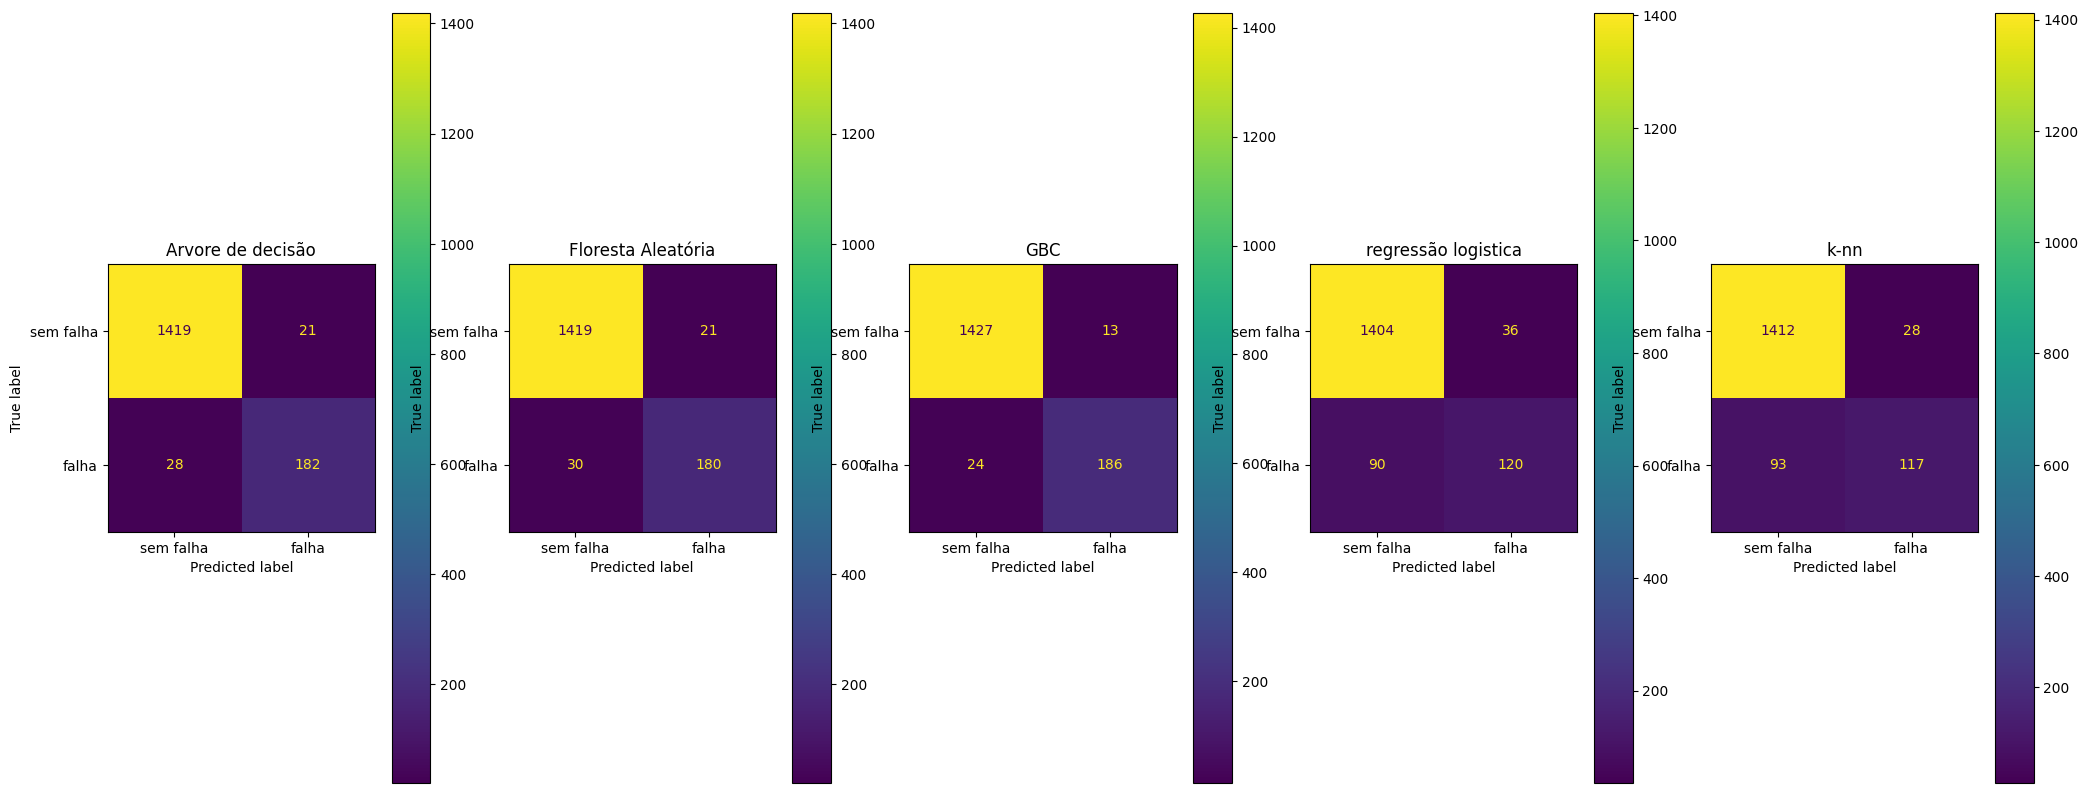

In [91]:
figure = plt.figure(figsize=(25,10))
i = 1
for nome_modelo, y_p in y_pred.items():
    cm = confusion_matrix(y_true=y_test,
                          y_pred=y_p,
                          labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=['sem falha', 'falha'])
    eixo = plt.subplot(1, 5, i)
    i+=1
    disp.plot(ax=eixo)
    eixo.set_title(nome_modelo)

    print(cm)
    print(nome_modelo)
    print('*'*50)

In [92]:
for nome_modelo,y_p in y_pred.items():
  print(f"Métricas do modelo: {nome_modelo}")
  print(classification_report(y_test, y_pred=y_p))
  print('-'*53 )

Métricas do modelo: Arvore de decisão
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1440
           1       0.90      0.87      0.88       210

    accuracy                           0.97      1650
   macro avg       0.94      0.93      0.93      1650
weighted avg       0.97      0.97      0.97      1650

-----------------------------------------------------
Métricas do modelo: Floresta Aleatória
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1440
           1       0.90      0.86      0.88       210

    accuracy                           0.97      1650
   macro avg       0.94      0.92      0.93      1650
weighted avg       0.97      0.97      0.97      1650

-----------------------------------------------------
Métricas do modelo: GBC
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1440
           1       0.93     

## Curva ROC e ROC-AUC



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


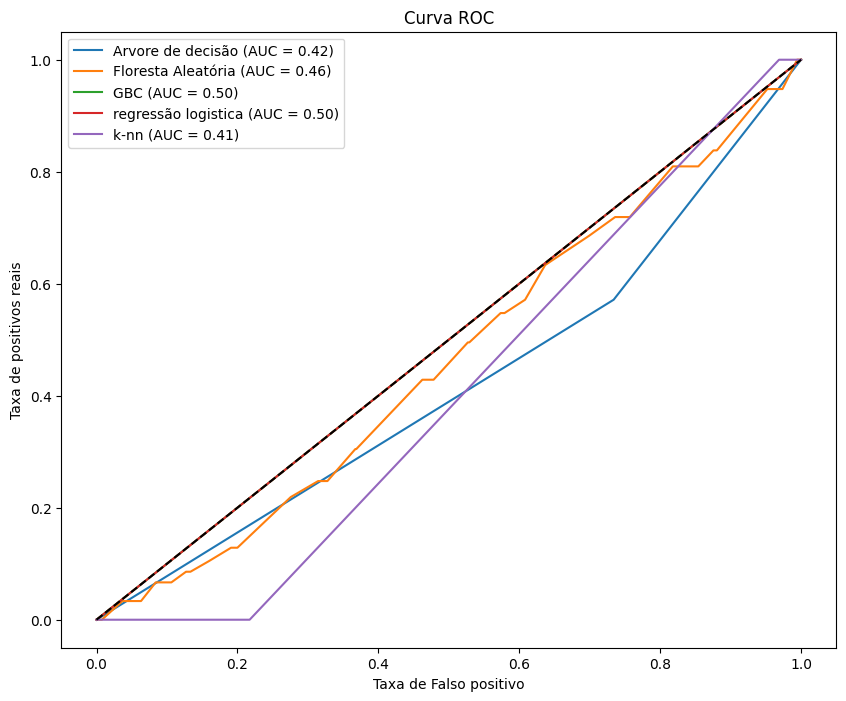

In [93]:
plt.figure(figsize=(10, 8))

for nome_modelo, modelo in modelos.items():
    if hasattr(modelo, "predict_proba"):
        y_prob = modelo.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc = roc_auc_score(y_test, y_prob)
        plt.plot(fpr, tpr, label=f'{nome_modelo} (AUC = {auc:.2f})')


plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falso positivo')
plt.ylabel('Taxa de positivos reais')
plt.title('Curva ROC')
plt.legend()
plt.show()

#Conclusão


**1. Conclusão**

Com a elaboração dessa atividade, podemos utilizar um modelo de Machine Learning para prever falhas em máquinas com base em dados de produção. Dentre os modelos testados, o GBC destacou-se com as melhores métricas de avaliação. Esse resultado indica uma boa capacidade do modelo em distinguir corretamente entre uma operação normal e uma possível falha.

**2. Como o modelo pode ajudar a empresa?**

Esse modelo pode auxiliar com as manutenções, ou seja, em vez de corrigir os problemas após uma quebra, é possível detectar possíveis falhas e com isso o time de manutenção realizar a correção. Na prática, as máquinas são monitoradas em tempo real, possibilitando uma intervenção. Com isso, alguns benefícios para a empresa são observados, como: redução de custos, aumento da eficiência operacional e maior segurança.

**3. O que seria pior para o modelo: falsos positivos ou falsos negativos?**

Um falso positivo poderia ocorrer quando o modelo prevê uma falha mas ela não acontece, gerando custos (ainda que pequenos) de manutenção preventiva. O pior cenário seria com a ocorrência de um falso negativo: onde o modelo não identifica falhas e a máquina quebra, ocasionando a pausa da produção, possíveis danos na máquina e custos de reparo emergenciais elevados.

# Salvando o pré-processamento e melhor modelo

In [94]:
import joblib

melhor_modelo = modelos['GBC']
padronizador = scaler

joblib.dump(melhor_modelo, 'modelo_preditivo_falha.pkl')

joblib.dump(padronizador, 'padronizador.pkl')

colunas_modelo = list(X_train.columns)
joblib.dump(colunas_modelo, 'colunas_modelo.pkl')

['colunas_modelo.pkl']

# Recebendo os dados do usuário

In [98]:
modelo = joblib.load('modelo_preditivo_falha.pkl')
scaler = joblib.load('padronizador.pkl')
colunas_do_modelo = joblib.load('colunas_modelo.pkl')

print("\n | Sistema de previsão de falha | \n")
print("Por favor, insira os dados da máquina:\n")

temp = float(input("Temperatura (°C): "))
vib = float(input("Vibração (mm/s): "))
press = float(input("Pressão (bar): "))
horas = float(input("Horas de uso: "))
mat = input("Material (ferro, aço, alumínio): ")
turno_op = input("Turno (manhã, tarde, noite): ")
oper = input("Operador (junior, pleno, senior): ")


dados_usuario = pd.DataFrame({
    'temperatura': [temp],
    'vibracao': [vib],
    'pressao': [press],
    'horas_uso': [horas],
    'material': [mat],
    'turno': [turno_op],
    'operador': [oper]
})

dados_usuario_encoded = pd.get_dummies(dados_usuario)
dados_para_previsao = dados_usuario_encoded.reindex(columns=colunas_do_modelo, fill_value=0)
dados_padronizados = scaler.transform(dados_para_previsao)
previsao = modelo.predict(dados_padronizados)

print("\n | Resultado da análise |\n")
if previsao[0] == 1:
    print("Previsão: Grande chance da operação ocorrer COM FALHA")
else:
    print("Previsão: Grande chance da operação ocorrer SEM FALHA")


 | Sistema de previsão de falha | 

Por favor, insira os dados da máquina:

Temperatura (°C): 115
Vibração (mm/s): 4.5
Pressão (bar): 145
Horas de Uso: 9000
Material (ferro, aço, alumínio): aço
Turno (manhã, tarde, noite): noite
Operador (junior, pleno, senior): junior

 | Resultado da análise |

Previsão: Grande chance da operação ocorrer COM FALHA
